# Structured Low-Rank Reconstruction with Submatrix Constraints - Phantom

In [2]:
# Import and setup notebook

import numpy as np
import skimage
import SLR
import matplotlib.pyplot as plt
import utils
import h5py

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Define Phantom

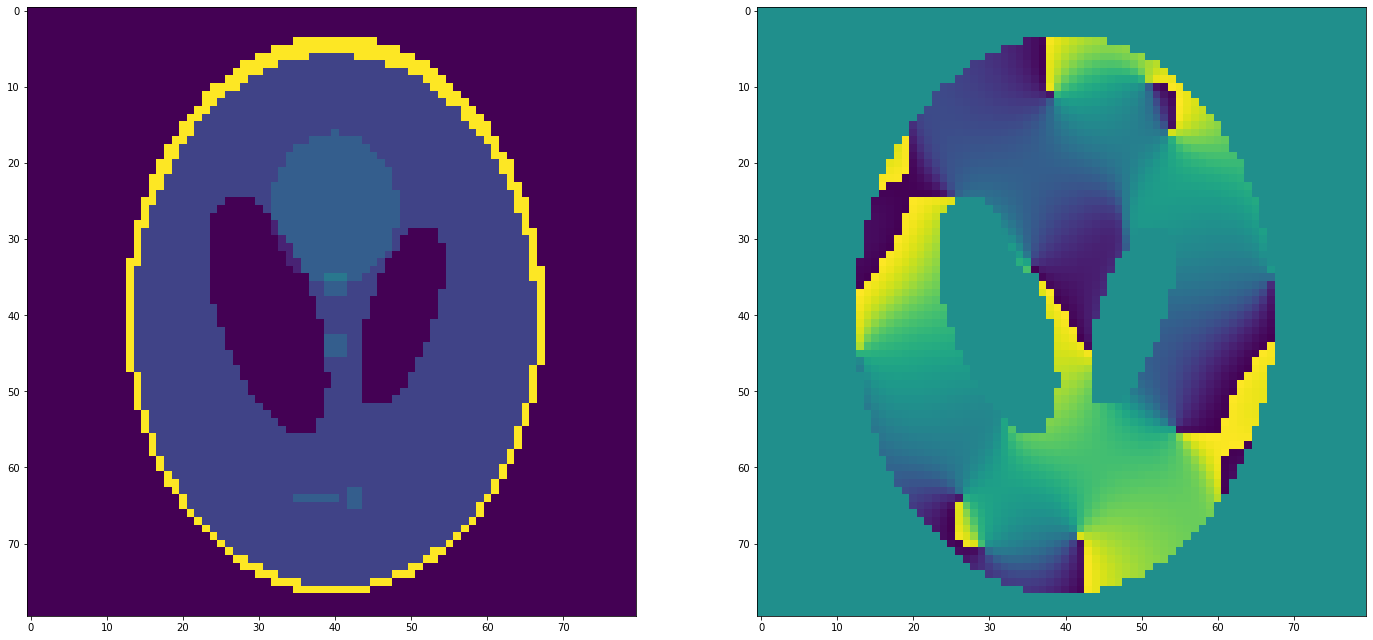

In [3]:
# Define 80x80 Shepp Logan Phantom w/ smooth phase
x = skimage.data.shepp_logan_phantom()[::5,::5]
phs = np.angle(utils.ifftdim(np.pad(np.random.standard_normal((6,6)),((37,37),(37,37)))))
x = x*np.exp(1j*phs)
x = x/np.max(np.abs(utils.fftdim(x)))

# Plot ground truth image magnitude and phase
_, ax = plt.subplots(1,2, figsize=(24,12))

ax[0].imshow(np.abs(x))
ax[1].imshow(np.angle(x))

## Define Sampling Mask

Under-sampling ratio: 0.5015625


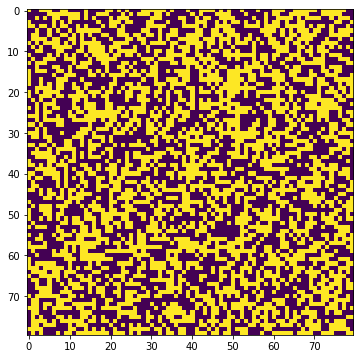

In [7]:
# Define Partial Fourier sampling mask
# mask = np.zeros((80,80))
# mask[:55,:] = 1

mask=np.random.random((80,80)) >= 1/2
mask[39:40,39:40] = True
print(f'Under-sampling ratio: {np.count_nonzero(mask)/80**2}')


# Plot sampling mask
_, ax = plt.subplots(figsize=(6,6))
ax.imshow(mask)

## Sample data and add noise

Text(0.5, 1.0, 'iFFT')

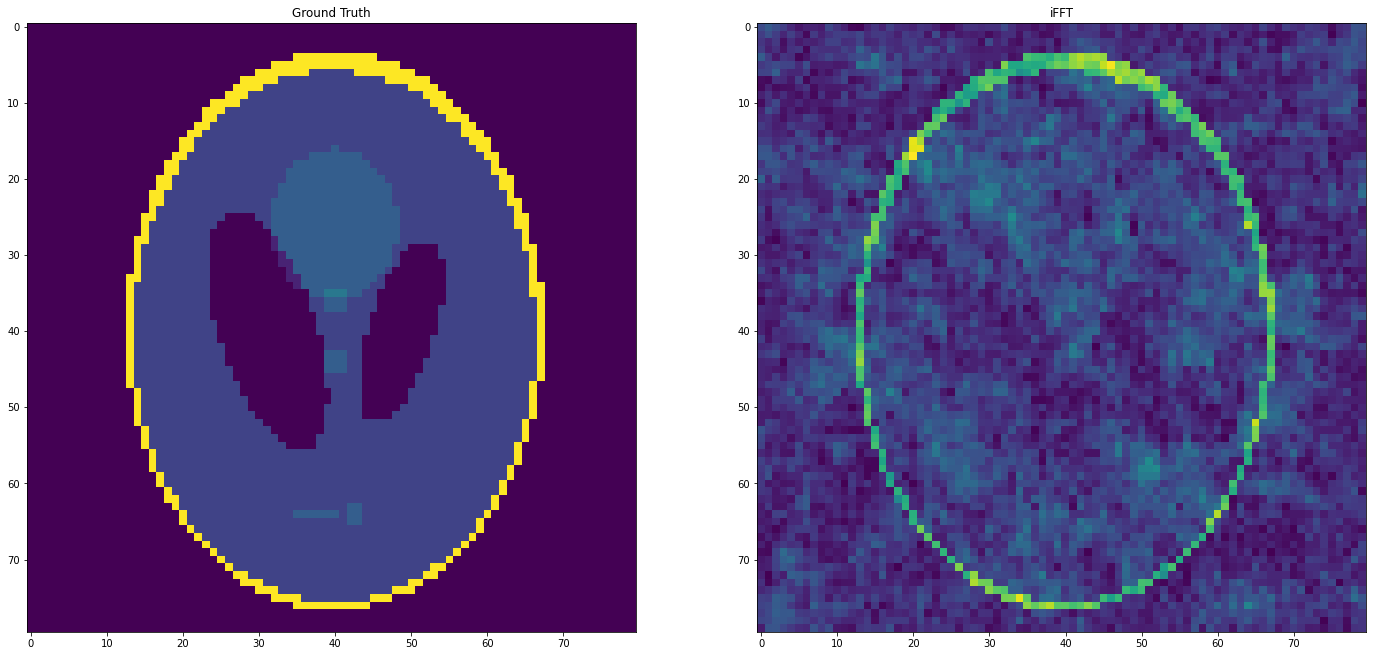

In [9]:
# sample and add noise
fx = (utils.fftdim(x)+utils.noise(x.shape, 1E-3))*mask
pg = utils.fftdim(x)
# pg.shape

_, ax = plt.subplots(1,2, figsize=(24,24))

ax[0].imshow(np.abs(utils.ifftdim(pg, dims=(0,1))))
ax[0].set_title('Ground Truth')
ax[1].imshow(np.abs(utils.ifftdim(fx, dims=(0,1))))
ax[1].set_title('iFFT')

## Define helper functions and setup parameters

In [1]:
def rmse(z):
    return np.linalg.norm(pg.ravel()-z.ravel())/np.linalg.norm(pg.ravel())


N = 1200
kernel = (9,9)

## ADMM, S-matrix

### Full Matrix Reconstruction

In [34]:
N = 1000

for r in np.arange(110,140,5):
    z = SLR.ADMM(fx, SLR.s_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=N, init=None, gt=pg, tol=1E-3)
    print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z[0])}')


Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.04861084121512761
Iter: 200, RMSE: 0.044229942498427294
Iter: 300, RMSE: 0.04415575703847532
Iter: 400, RMSE: 0.043981092381651855
Iter: 500, RMSE: 0.044214584880957794
Iter: 600, RMSE: 0.04413422962032077
Iter: 700, RMSE: 0.04439496704401153
Iter: 800, RMSE: 0.04465687918345449
Iter: 900, RMSE: 0.044899441859160616
Rank: 110, Full Matrix, RMSE: 0.045269028050611095
Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.05772355066590201
Iter: 200, RMSE: 0.040851585029544404
Iter: 300, RMSE: 0.040071411108981846
Iter: 400, RMSE: 0.040101530565496084
Iter: 500, RMSE: 0.04029310964206498
Iter: 600, RMSE: 0.040421913059925284
Iter: 700, RMSE: 0.040411671935910415
Iter: 800, RMSE: 0.04045765055341837
Iter: 900, RMSE: 0.040472868946511
Rank: 115, Full Matrix, RMSE: 0.04057247827558523
Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.09256472219185878
Iter: 200, RMSE: 0.044892035925969784
Iter: 300, RMSE: 0.039342918338112445
Iter: 400, 

In [38]:
r=125
z5vcc_125 = SLR.ADMM(fx, SLR.s_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5vcc_125[0])}')


Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.16420843680863265
Iter: 200, RMSE: 0.0796341801474991
Iter: 300, RMSE: 0.0507448913643593
Iter: 400, RMSE: 0.04247273197434094
Iter: 500, RMSE: 0.04041017863106362
Iter: 600, RMSE: 0.03990953782434091
Iter: 700, RMSE: 0.039741155858026886
Iter: 800, RMSE: 0.039626761987721505
Iter: 900, RMSE: 0.03962350377668255
Iter: 1000, RMSE: 0.03966115824497256
Iter: 1100, RMSE: 0.039596732239223935
Rank: 125, Full Matrix, RMSE: 0.03958973919347565


In [39]:
r=120
z5vcc_120 = SLR.ADMM(fx, SLR.s_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5vcc_120[0])}')



Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.09256472219185878
Iter: 200, RMSE: 0.044892035925969784
Iter: 300, RMSE: 0.039342918338112445
Iter: 400, RMSE: 0.03888351871905376
Iter: 500, RMSE: 0.038873712448970574
Iter: 600, RMSE: 0.03893256209226668
Iter: 700, RMSE: 0.03896945318002363
Iter: 800, RMSE: 0.039028114497234666
Iter: 900, RMSE: 0.0390330093614451
Iter: 1000, RMSE: 0.039210040379847086
Iter: 1100, RMSE: 0.039312475151906855
Rank: 120, Full Matrix, RMSE: 0.03925473139766531


In [35]:
N=1200
for r in np.arange(110,135,5):
    x2ini = SLR.ADMM(fx, SLR.s_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2ini[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.2093238367997317
Iter: 200, RMSE: 0.06043948917932132
Iter: 300, RMSE: 0.035306987017428806
Iter: 400, RMSE: 0.03341444538311097
Iter: 500, RMSE: 0.033078914477886204
Iter: 600, RMSE: 0.03306510276355479
Iter: 700, RMSE: 0.033489238240856235
Iter: 800, RMSE: 0.0335026734528503
Iter: 900, RMSE: 0.03343671069658056
Iter: 1000, RMSE: 0.033019786411441106
Iter: 1100, RMSE: 0.03319817501834211
Rank: 110, Batch Size (Block): 2, RMSE: 0.03323917560381996
Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.3138534490228944
Iter: 200, RMSE: 0.18809312776730142
Iter: 300, RMSE: 0.07524103425819839
Iter: 400, RMSE: 0.03952063133817066
Iter: 500, RMSE: 0.0333106962086185
Iter: 600, RMSE: 0.03263414139972831
Iter: 700, RMSE: 0.03274222037073388
Iter: 800, RMSE: 0.03249430344142189
Iter: 900, RMSE: 0.03255203434408937
Iter: 1000, RMSE: 0.03298219185962873
Iter: 1100, RMSE: 0.032704362298452964
Rank: 115, Batch Size (Block): 2, RMSE: 0.03256965547

In [36]:
N=1200
for r in np.arange(90,130,5):
    x4ini = SLR.ADMM(fx, SLR.s_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.16202698316289554
Iter: 200, RMSE: 0.038412632196513946
Iter: 300, RMSE: 0.03890724060921185
Iter: 400, RMSE: 0.03684409809790518
Iter: 500, RMSE: 0.03669202632483134
Iter: 600, RMSE: 0.03682007398222121
Iter: 700, RMSE: 0.036319962576106375
Iter: 800, RMSE: 0.03661919469460879
Iter: 900, RMSE: 0.03696263492411826
Iter: 1000, RMSE: 0.03589950168262501
Iter: 1100, RMSE: 0.03655325077169412
Rank: 90, Batch Size (Block): 2, RMSE: 0.03578361146218636
Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.27058481797164496
Iter: 200, RMSE: 0.08894136008687728
Iter: 300, RMSE: 0.03506849995829892
Iter: 400, RMSE: 0.03293094564909935
Iter: 500, RMSE: 0.033199422675647704
Iter: 600, RMSE: 0.03301158463902821
Iter: 700, RMSE: 0.03319375276580924
Iter: 800, RMSE: 0.03380495716956191
Iter: 900, RMSE: 0.03349995643890424
Iter: 1000, RMSE: 0.03313652024488163
Iter: 1100, RMSE: 0.03327362864168432
Rank: 95, Batch Size (Block): 2, RMSE: 0.03353495330

In [37]:
for r in np.arange(90,130,5):
    x8ini = SLR.ADMM(fx, SLR.s_matrix, kernel, r, batch=SLR.sub_block(8), p=1E-10,  niters=1200, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {8}, RMSE: {rmse(x8ini[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.24314010278019413
Iter: 200, RMSE: 0.05904242872126212
Iter: 300, RMSE: 0.03408113360659635
Iter: 400, RMSE: 0.03438897664402277
Iter: 500, RMSE: 0.03442162889664534
Iter: 600, RMSE: 0.03360502895127552
Iter: 700, RMSE: 0.03448237923225539
Iter: 800, RMSE: 0.03342777535204116
Iter: 900, RMSE: 0.03446820655873023
Iter: 1000, RMSE: 0.03380947475851592
Iter: 1100, RMSE: 0.03403813293567717
Rank: 90, Batch Size (Block): 8, RMSE: 0.03446147050629622
Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.3160295442476239
Iter: 200, RMSE: 0.20532002109583192
Iter: 300, RMSE: 0.0841335749050832
Iter: 400, RMSE: 0.0316690886427409
Iter: 500, RMSE: 0.03152349717125006
Iter: 600, RMSE: 0.03179340190989628
Iter: 700, RMSE: 0.03214616076942954
Iter: 800, RMSE: 0.03221521168677935
Iter: 900, RMSE: 0.031592902118868636
Iter: 1000, RMSE: 0.03185485687363332
Iter: 1100, RMSE: 0.03291926260650599
Rank: 95, Batch Size (Block): 8, RMSE: 0.0326497992693859

In [71]:
# special s submatrix
r=100
x8s_100 = SLR.ADMM(fx, SLR.s_matrix, kernel, r, batch=SLR.sub_block(8), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {8}, RMSE: {rmse(x8s_100[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.3824111495474397
Iter: 200, RMSE: 0.310281999932547
Iter: 300, RMSE: 0.24450321160454347
Iter: 400, RMSE: 0.17824648262377218
Iter: 500, RMSE: 0.10278567649645261
Iter: 600, RMSE: 0.03428806820293429
Iter: 700, RMSE: 0.029012965141535153
Iter: 800, RMSE: 0.02988085694149337
Iter: 900, RMSE: 0.030331172979113526
Iter: 1000, RMSE: 0.030261617917514392
Iter: 1100, RMSE: 0.03001816058215855
Rank: 100, Batch Size (Block): 8, RMSE: 0.030371646781894225


## c_matrix

In [18]:
N = 1000

for r in np.arange(50,110,5):
    z = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(1),p=1E-10, niters=1000, init=None, gt=pg)
    print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z[0])}')



Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.331914729295428
Iter: 200, RMSE: 0.33034982691247794
Iter: 300, RMSE: 0.33210451400387436
Iter: 400, RMSE: 0.33107726829263756
Iter: 500, RMSE: 0.3312660784785678
Iter: 600, RMSE: 0.3330848348583712
Iter: 700, RMSE: 0.33097739062967596
Iter: 800, RMSE: 0.3333997720631658
Iter: 900, RMSE: 0.33432857007017674
Rank: 50, Full Matrix, RMSE: 0.33670920209444877
Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.2919568890975757
Iter: 200, RMSE: 0.3004226080342111
Iter: 300, RMSE: 0.30323629332137264
Iter: 400, RMSE: 0.3046064140664022
Iter: 500, RMSE: 0.3054798672612089
Iter: 600, RMSE: 0.30601874624686776
Iter: 700, RMSE: 0.30602383666477073
Iter: 800, RMSE: 0.30617039484233743
Iter: 900, RMSE: 0.30647072753044335
Rank: 55, Full Matrix, RMSE: 0.30594892295383413
Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.24714917284915827
Iter: 200, RMSE: 0.26633494637744637
Iter: 300, RMSE: 0.2799519212568899
Iter: 400, RMSE: 0.28794214708163

In [15]:
r=60
z5c_60 = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(1),p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5c_60[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.24714917284889545
Iter: 200, RMSE: 0.2663349463792651
Iter: 300, RMSE: 0.27995192119401213
Iter: 400, RMSE: 0.28794214538500507
Iter: 500, RMSE: 0.2928419380300225
Iter: 600, RMSE: 0.2959137402682446
Iter: 700, RMSE: 0.2979617078037064
Iter: 800, RMSE: 0.2992240526599809
Iter: 900, RMSE: 0.3001244270780886
Iter: 1000, RMSE: 0.30065530206754587
Iter: 1100, RMSE: 0.30113070367302175
Rank: 60, Full Matrix, RMSE: 0.3016212033008699


In [16]:
r=65
z5c_65 = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(1),p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5c_65[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.25598023431994693
Iter: 200, RMSE: 0.22586174926383315
Iter: 300, RMSE: 0.21273273725833552
Iter: 400, RMSE: 0.20648726031180917
Iter: 500, RMSE: 0.20359938014576134
Iter: 600, RMSE: 0.2025535951267055
Iter: 700, RMSE: 0.2024252157986184
Iter: 800, RMSE: 0.20283861986727783
Iter: 900, RMSE: 0.203485069829461
Iter: 1000, RMSE: 0.20412910622519378
Iter: 1100, RMSE: 0.20466475476740315
Rank: 65, Full Matrix, RMSE: 0.20519505564579354


In [17]:
r=70
z5c_70 = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(1),p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5c_70[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.3637974468449463
Iter: 200, RMSE: 0.3260782761491484
Iter: 300, RMSE: 0.3040967701633752
Iter: 400, RMSE: 0.2888580742041184
Iter: 500, RMSE: 0.27581204192009606
Iter: 600, RMSE: 0.26716704106234496
Iter: 700, RMSE: 0.2605077201275335
Iter: 800, RMSE: 0.2550375278257538
Iter: 900, RMSE: 0.2503924933886456
Iter: 1000, RMSE: 0.2464066866870344
Iter: 1100, RMSE: 0.24296795852949546
Rank: 70, Full Matrix, RMSE: 0.2400121243078646


In [22]:
for r in np.arange(50,90,5):
    x2ini = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=1200, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2ini[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.2704277881825902
Iter: 200, RMSE: 0.2878128263099734
Iter: 300, RMSE: 0.28528883007663636
Iter: 400, RMSE: 0.2721968570803942
Iter: 500, RMSE: 0.2686012562944133
Iter: 600, RMSE: 0.270874398937142
Iter: 700, RMSE: 0.27560772544001927
Iter: 800, RMSE: 0.2874884338857206
Iter: 900, RMSE: 0.25926689299985894
Iter: 1000, RMSE: 0.2819273780936963
Iter: 1100, RMSE: 0.26984998356689427
Rank: 50, Batch Size (Block): 2, RMSE: 0.2779164777948482
Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.21688492300297255
Iter: 200, RMSE: 0.2398100946732903
Iter: 300, RMSE: 0.22449737513782295
Iter: 400, RMSE: 0.2244472720819051
Iter: 500, RMSE: 0.23183979739516405
Iter: 600, RMSE: 0.22110436296042757
Iter: 700, RMSE: 0.23246208181426412
Iter: 800, RMSE: 0.2439866511076447
Iter: 900, RMSE: 0.22850756903114713
Iter: 1000, RMSE: 0.23870045888885127
Iter: 1100, RMSE: 0.22624541378962823
Rank: 55, Batch Size (Block): 2, RMSE: 0.23024736490247835
Iter: 0,

In [30]:
r=65
x2c_65 = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2c_65[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.2295278243679048
Iter: 200, RMSE: 0.19136189381252816
Iter: 300, RMSE: 0.17074380801706301
Iter: 400, RMSE: 0.15910974812740275
Iter: 500, RMSE: 0.15405017882451938
Iter: 600, RMSE: 0.14931915903289428
Iter: 700, RMSE: 0.14485331695685777
Iter: 800, RMSE: 0.14380108132705188
Iter: 900, RMSE: 0.1416060403651936
Iter: 1000, RMSE: 0.14063573312843103
Iter: 1100, RMSE: 0.1393128197916012
Rank: 65, Batch Size (Block): 2, RMSE: 0.13872499595672982


In [20]:
for r in np.arange(50,90,5):
    x4ini = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=1200, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.2299882892793867
Iter: 200, RMSE: 0.22904558882039097
Iter: 300, RMSE: 0.2432021078884411
Iter: 400, RMSE: 0.22668236492461988
Iter: 500, RMSE: 0.22795376106244597
Iter: 600, RMSE: 0.24459886314094828
Iter: 700, RMSE: 0.23799729600373554
Iter: 800, RMSE: 0.23791080504268955
Iter: 900, RMSE: 0.21438092637127035
Iter: 1000, RMSE: 0.23814240868150677
Iter: 1100, RMSE: 0.22837295998142898
Rank: 50, Batch Size (Block): 4, RMSE: 0.23370433486446007
Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.1818571323922116
Iter: 200, RMSE: 0.1750641678864354
Iter: 300, RMSE: 0.1831215575670708
Iter: 400, RMSE: 0.1883931504336274
Iter: 500, RMSE: 0.18510601911733826
Iter: 600, RMSE: 0.17944974544809508
Iter: 700, RMSE: 0.19269915129926918
Iter: 800, RMSE: 0.19303264240224785
Iter: 900, RMSE: 0.20630877876328785
Iter: 1000, RMSE: 0.19256551184242673
Iter: 1100, RMSE: 0.20787597103121822
Rank: 55, Batch Size (Block): 4, RMSE: 0.1878605631371378
Ite

In [31]:
r=60
x4c_60 = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4c_60[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.15311418522469022
Iter: 200, RMSE: 0.13015535633340028
Iter: 300, RMSE: 0.12267743889847146
Iter: 400, RMSE: 0.11744505453326387
Iter: 500, RMSE: 0.11434726379173234
Iter: 600, RMSE: 0.11432389243773328
Iter: 700, RMSE: 0.11787914043249095
Iter: 800, RMSE: 0.11435004704517793
Iter: 900, RMSE: 0.1158054809222884
Iter: 1000, RMSE: 0.11476386053256267
Iter: 1100, RMSE: 0.11445433158989315
Rank: 60, Batch Size (Block): 4, RMSE: 0.11511178720376963


In [21]:
for r in np.arange(50,90,5):
    x8ini = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(8), p=1E-10,  niters=1200, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {8}, RMSE: {rmse(x8ini[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.16679183031543846
Iter: 200, RMSE: 0.16545648957092984
Iter: 300, RMSE: 0.1564716532534164
Iter: 400, RMSE: 0.15738947947850157
Iter: 500, RMSE: 0.1509559493094766
Iter: 600, RMSE: 0.15554837662000986
Iter: 700, RMSE: 0.16096689167958017
Iter: 800, RMSE: 0.1626892552129013
Iter: 900, RMSE: 0.15250036297861297
Iter: 1000, RMSE: 0.156326603189127
Iter: 1100, RMSE: 0.16232953141550627
Rank: 50, Batch Size (Block): 8, RMSE: 0.16338175666524152
Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.13637444558495804
Iter: 200, RMSE: 0.11911546137488581
Iter: 300, RMSE: 0.11676786961794464
Iter: 400, RMSE: 0.11350411858494805
Iter: 500, RMSE: 0.11228684287994209
Iter: 600, RMSE: 0.11558372103985029
Iter: 700, RMSE: 0.11364643094066515
Iter: 800, RMSE: 0.11323318874552012
Iter: 900, RMSE: 0.11046798905642068
Iter: 1000, RMSE: 0.11479462498765429
Iter: 1100, RMSE: 0.11296418671675723
Rank: 55, Batch Size (Block): 8, RMSE: 0.11072464929877339
I

In [24]:
r=60
x8c_60 = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(8), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {8}, RMSE: {rmse(x8c_60[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.15586852294124248
Iter: 200, RMSE: 0.12985930748876015
Iter: 300, RMSE: 0.11877135585354179
Iter: 400, RMSE: 0.11119726001476474
Iter: 500, RMSE: 0.10718391461696494
Iter: 600, RMSE: 0.10557415617112323
Iter: 700, RMSE: 0.10456396648298366
Iter: 800, RMSE: 0.10364775963603262
Iter: 900, RMSE: 0.1026135744700542
Iter: 1000, RMSE: 0.10322080150935717
Iter: 1100, RMSE: 0.10225390374191004
Rank: 60, Batch Size (Block): 8, RMSE: 0.10240165087186254


In [25]:
r=65
x8c_65 = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(8), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {8}, RMSE: {rmse(x8c_65[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.24700162711574994
Iter: 200, RMSE: 0.18837981545928847
Iter: 300, RMSE: 0.1601629496765641
Iter: 400, RMSE: 0.14911645808855292
Iter: 500, RMSE: 0.1408498626850845
Iter: 600, RMSE: 0.13479542105119688
Iter: 700, RMSE: 0.1302525547316998
Iter: 800, RMSE: 0.12672687450462344
Iter: 900, RMSE: 0.1237272445197506
Iter: 1000, RMSE: 0.12104132817099929
Iter: 1100, RMSE: 0.1183124445924211
Rank: 65, Batch Size (Block): 8, RMSE: 0.1164282496362603


In [235]:
r=65

rc=np.zeros([10])
for i in range(10):
    x8c_sub = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(8), p=1E-10,  niters=1200, init=None, gt=pg)
    rc[i]=rmse(x8c_sub[0])
    print(f'Rank: {r}, Batch Size (Block): {8}, RMSE: {rc[i]}')

Iter: 0, RMSE: 0.6585163018538698
Iter: 100, RMSE: 0.2111030740111988
Iter: 200, RMSE: 0.1751139519076355
Iter: 300, RMSE: 0.15647204988158991
Iter: 400, RMSE: 0.14308203128429897
Iter: 500, RMSE: 0.1330466521656347
Iter: 600, RMSE: 0.12494075079467497
Iter: 700, RMSE: 0.11813732589839541
Iter: 800, RMSE: 0.11258706220359394
Iter: 900, RMSE: 0.10816918826774127
Iter: 1000, RMSE: 0.10464092475895581
Iter: 1100, RMSE: 0.10194969600024432
Rank: 65, Batch Size (Block): 8, RMSE: 0.09983823751030109
Iter: 0, RMSE: 0.6585163018538698
Iter: 100, RMSE: 0.20939032305038527
Iter: 200, RMSE: 0.1716655299075306
Iter: 300, RMSE: 0.15237806007951948
Iter: 400, RMSE: 0.1391423199885403
Iter: 500, RMSE: 0.12924144410299576
Iter: 600, RMSE: 0.12152132622659689
Iter: 700, RMSE: 0.11520876471680716
Iter: 800, RMSE: 0.11038151845308866
Iter: 900, RMSE: 0.10620534716154663
Iter: 1000, RMSE: 0.10310052679963068
Iter: 1100, RMSE: 0.10049139166602748
Rank: 65, Batch Size (Block): 8, RMSE: 0.09850993823958121
I

In [27]:
r=60
x16c_60 = SLR.ADMM(fx, SLR.c_matrix, kernel, r, batch=SLR.sub_block(16), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {16}, RMSE: {rmse(x16c_60[0])}')

Iter: 0, RMSE: 0.6644227669202752
Iter: 100, RMSE: 0.30682966969844055
Iter: 200, RMSE: 0.25090937560862137
Iter: 300, RMSE: 0.21894765367342559
Iter: 400, RMSE: 0.18754579707079896
Iter: 500, RMSE: 0.15755742428626066
Iter: 600, RMSE: 0.14026420238992704
Iter: 700, RMSE: 0.13334404028773167
Iter: 800, RMSE: 0.12874063241113645
Iter: 900, RMSE: 0.1258440025184018
Iter: 1000, RMSE: 0.12326747903091609
Iter: 1100, RMSE: 0.1205943064244569
Rank: 60, Batch Size (Block): 16, RMSE: 0.11911752535342443


Text(0.5, 1.0, 'Submatrix 16 diff ')

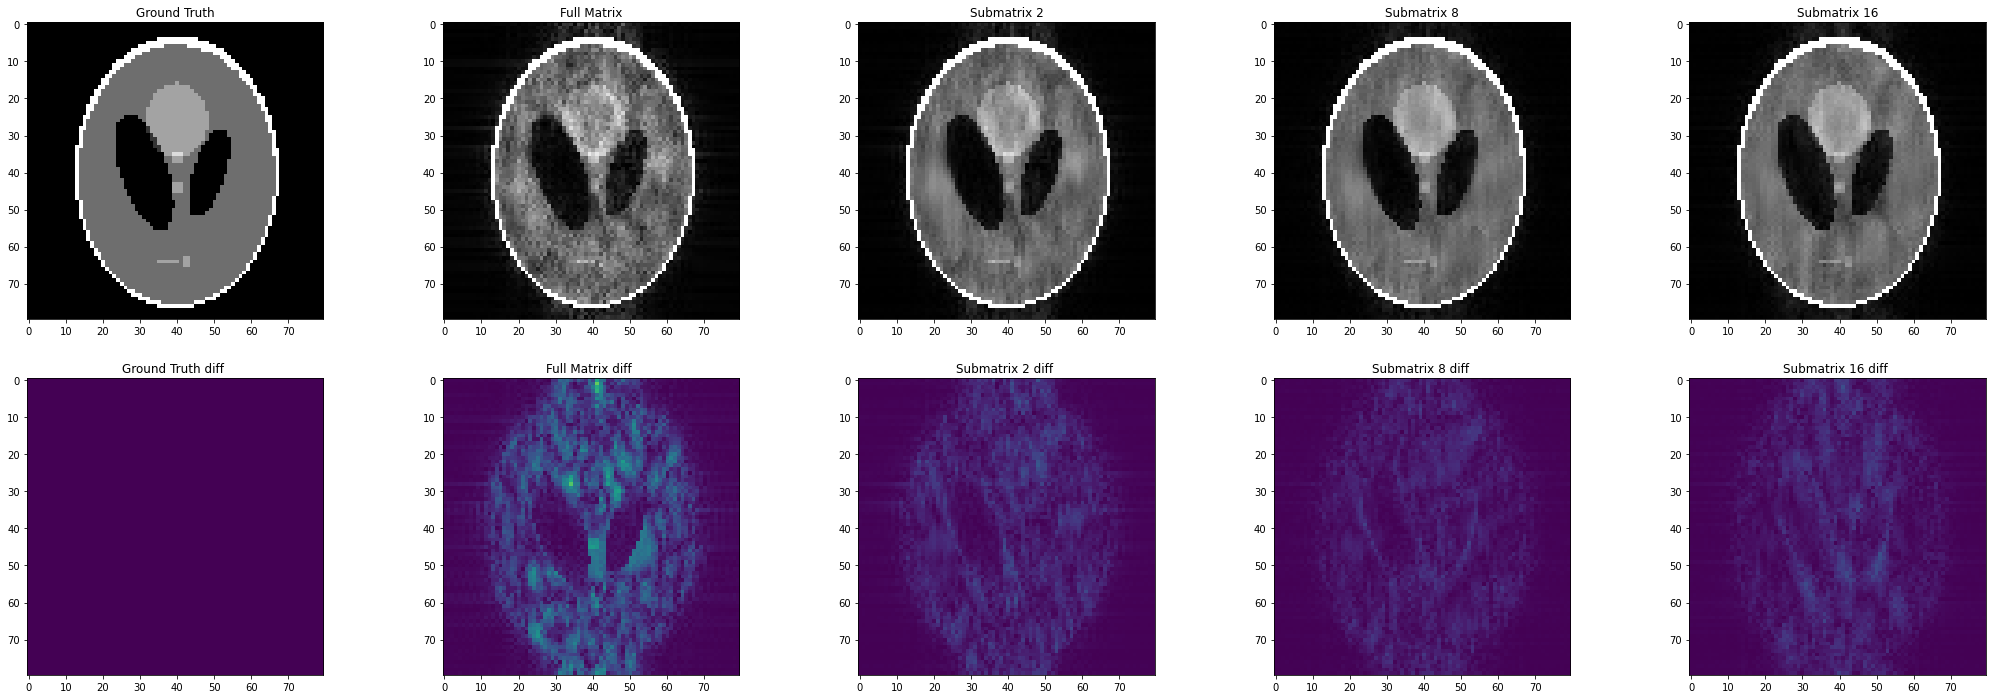

In [33]:
_, ax = plt.subplots(2,5, figsize=(36,12))

ax[0,0].imshow(np.abs(utils.ifftdim(pg, dims=(0,1))), vmin=0, vmax=1E-1, cmap='gray')
ax[0,0].set_title('Ground Truth')
ax[0,1].imshow(np.abs(utils.ifftdim(z5c_65[0], dims=(0,1))), vmin=0, vmax=1E-1, cmap='gray')
ax[0,1].set_title('Full Matrix')
ax[0,2].imshow(np.abs(utils.ifftdim(x2c_65[0], dims=(0,1))), vmin=0, vmax=1E-1, cmap='gray')
ax[0,2].set_title('Submatrix 2')
ax[0,3].imshow(np.abs(utils.ifftdim(x8c_60[0], dims=(0,1))), vmin=0, vmax=1E-1, cmap='gray')
ax[0,3].set_title('Submatrix 8')
ax[0,4].imshow(np.abs(utils.ifftdim(x16c_60[0], dims=(0,1))), vmin=0, vmax=1E-1, cmap='gray')
ax[0,4].set_title('Submatrix 16')
# ax[0,5].imshow(np.abs(utils.ifftdim(x32c_sub[0], dims=(0,1))), vmin=0, vmax=2E-1, cmap='gray')
# ax[0,5].set_title('Submatrix 32')

ax[1,0].imshow(np.abs(utils.ifftdim(pg-pg, dims=(0,1))), vmin=0, vmax=1E-1)
ax[1,0].set_title('Ground Truth diff ')
ax[1,1].imshow(np.abs(utils.ifftdim(z5c_60[0]-pg, dims=(0,1))), vmin=0, vmax=1E-1)
ax[1,1].set_title('Full Matrix diff ')
ax[1,2].imshow(np.abs(utils.ifftdim(x2c_65[0]-pg, dims=(0,1))), vmin=0, vmax=1E-1)
ax[1,2].set_title('Submatrix 2 diff ')
ax[1,3].imshow(np.abs(utils.ifftdim(x8c_60[0]-pg, dims=(0,1))), vmin=0, vmax=1E-1)
ax[1,3].set_title('Submatrix 8 diff ')
ax[1,4].imshow(np.abs(utils.ifftdim(x16c_60[0]-pg, dims=(0,1))), vmin=0, vmax=1E-1)
ax[1,4].set_title('Submatrix 16 diff ')
# ax[1,5].imshow(np.abs(utils.ifftdim(x32c_sub[0]-pg, dims=(0,1))), vmin=0, vmax=2E-1)
# ax[1,5].set_title('Submatrix 32 diff ')

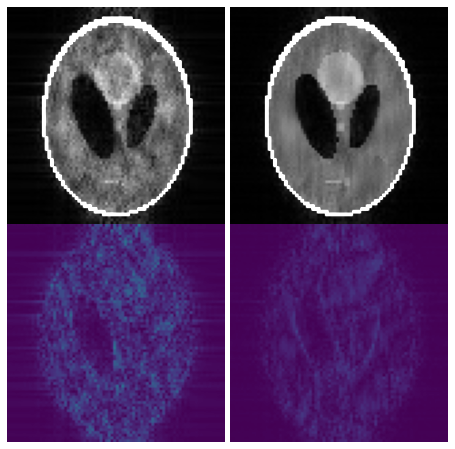

In [78]:
_, ax = plt.subplots(2,2, figsize=(8,8))
# 
# ax[0,0].imshow(np.abs(utils.ifftdim(pg, dims=(0,1))), vmin=0, vmax=2E-1, cmap='gray')
# ax[0,0].set_title('Ground Truth')
ax[0,0].imshow(np.abs(utils.ifftdim(z5c_65[0], dims=(0,1))), vmin=0, vmax=1E-1, cmap='gray')
# ax[0,0].set_title('SLR')
ax[0,0].axis('off')
ax[0,1].imshow(np.abs(utils.ifftdim(x8c_60[0], dims=(0,1))), vmin=0, vmax=1E-1, cmap='gray')
# ax[0,1].set_title('LSLR(8)')
ax[0,1].axis('off')

# ax[1,0].imshow(np.abs(utils.ifftdim(pg-pg, dims=(0,1))), vmin=0, vmax=2E-2)
# ax[1,0].set_title('Ground Truth diff (x10)')
ax[1,0].imshow(np.abs(utils.ifftdim(z5c_65[0]-pg, dims=(0,1))), vmin=0, vmax=1E-1)
# ax[1,0].set_title('SLR diff')
ax[1,0].axis('off')
plt.axis('off')
ax[1,1].imshow(np.abs(utils.ifftdim(x8c_60[0]-pg, dims=(0,1))), vmin=0, vmax=1E-1)
# ax[1,1].set_title('LSLR(2) diff')
ax[1,1].axis('off')
# plt.rc('font', size=12)
plt.subplots_adjust(wspace=0,hspace=0)

Text(0, 0.5, 'log(RMSE)')

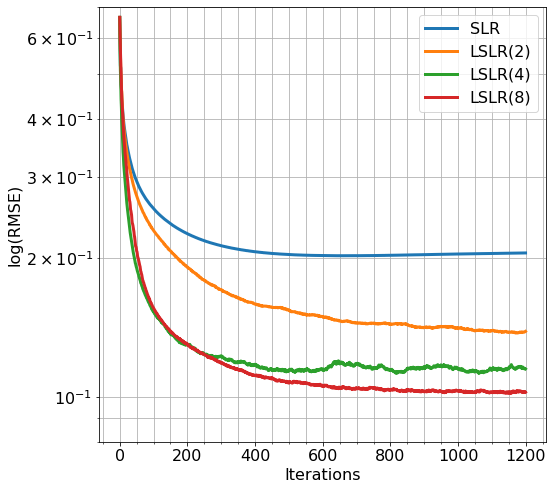

In [80]:
_, ax = plt.subplots(figsize=(8,8))
ax.semilogy(z5c_65[1], linewidth=3, label='SLR')
ax.semilogy(x2c_65[1], linewidth=3, label='LSLR(2)')
ax.semilogy(x4c_60[1], linewidth=3, label='LSLR(4)')
ax.semilogy(x8c_60[1], linewidth=3, label='LSLR(8)')
# ax.semilogy(x12[1], linewidth=3, label='x12')
plt.legend()
plt.rc('font', size=16)
plt.ylim([0.08,0.7])
plt.grid(b=True, which='major') 
plt.grid(b=True, which='minor') 
plt.minorticks_on()
plt.xlabel('Iterations')
plt.ylabel('log(RMSE)')

## PF sampling

Under-sampling ratio: 0.75


Text(0.5, 1.0, 'iFFT')

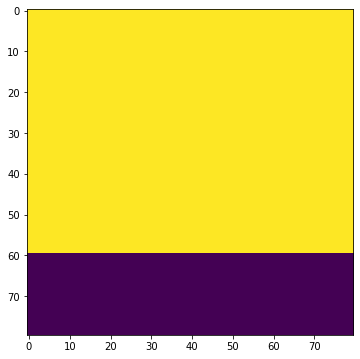

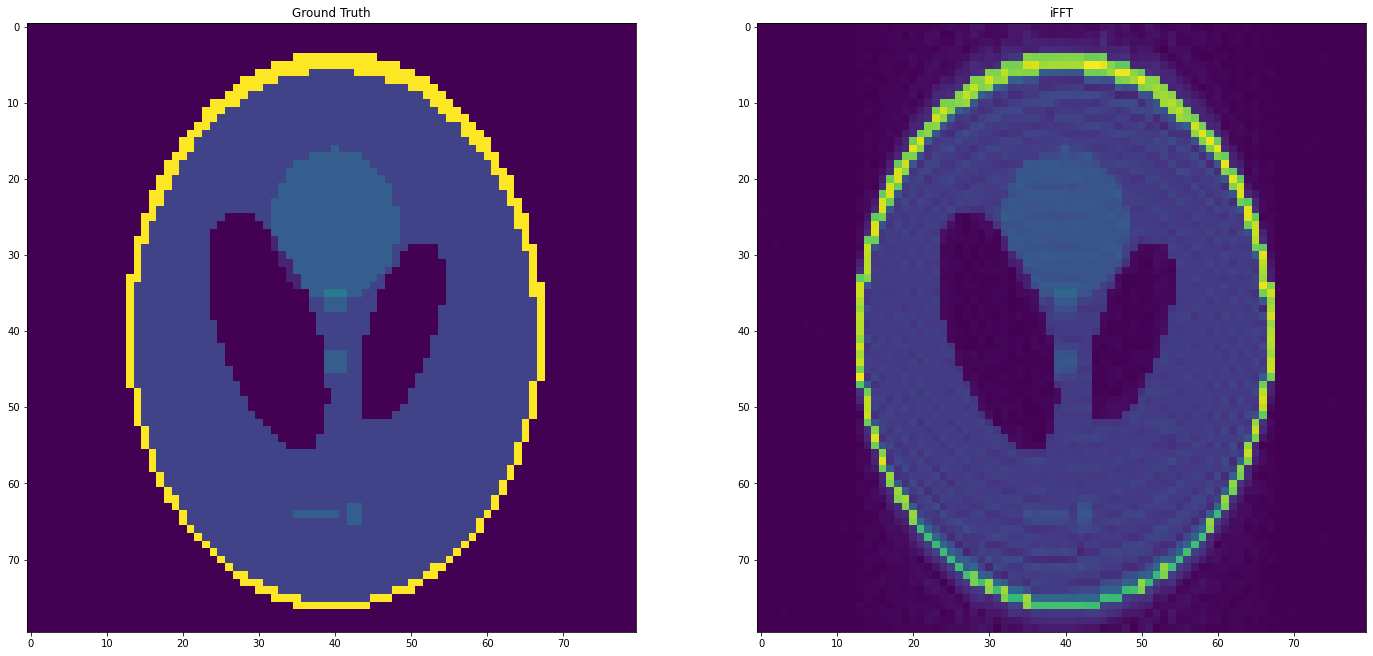

In [42]:
# Define Partial Fourier sampling mask
mask2 = np.zeros((80,80))
mask2[:60,:] = 1

# mask=np.random.random((80,80)) >= 1/2
# mask[39:40,39:40] = True
print(f'Under-sampling ratio: {np.count_nonzero(mask2)/80**2}')


# Plot sampling mask
_, ax = plt.subplots(figsize=(6,6))
ax.imshow(mask2)

# sample and add noise
fx2 = (utils.fftdim(x)+utils.noise(x.shape, 1E-3))*mask2

_, ax = plt.subplots(1,2, figsize=(24,24))

ax[0].imshow(np.abs(utils.ifftdim(pg, dims=(0,1))))
ax[0].set_title('Ground Truth')
ax[1].imshow(np.abs(utils.ifftdim(fx2, dims=(0,1))))
ax[1].set_title('iFFT')

In [44]:
r=120
z5s_120PF = SLR.ADMM(fx2, SLR.s_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5s_120PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.10605544950374189
Iter: 200, RMSE: 0.07094135550889026
Iter: 300, RMSE: 0.061161293269118074
Iter: 400, RMSE: 0.05713836565603514
Iter: 500, RMSE: 0.05436501420899702
Iter: 600, RMSE: 0.05232933763771415
Iter: 700, RMSE: 0.05070673551574269
Iter: 800, RMSE: 0.04947488883268391
Iter: 900, RMSE: 0.048490078446853824
Iter: 1000, RMSE: 0.04765235107318288
Iter: 1100, RMSE: 0.0469724891886924
Rank: 120, Full Matrix, RMSE: 0.04643610660274217


In [45]:
r=115
z5s_115PF = SLR.ADMM(fx2, SLR.s_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5s_115PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.07325696463336881
Iter: 200, RMSE: 0.057901836670294624
Iter: 300, RMSE: 0.05281026346373554
Iter: 400, RMSE: 0.04991007464545824
Iter: 500, RMSE: 0.04808024952672406
Iter: 600, RMSE: 0.04693185067630178
Iter: 700, RMSE: 0.04618946996317926
Iter: 800, RMSE: 0.045469514463854284
Iter: 900, RMSE: 0.04499951435823225
Iter: 1000, RMSE: 0.044666292810488284
Iter: 1100, RMSE: 0.04437172512096531
Rank: 115, Full Matrix, RMSE: 0.04409902121693048


In [48]:
r=110
z5s_110PF = SLR.ADMM(fx2, SLR.s_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5s_110PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.05955852148337262
Iter: 200, RMSE: 0.05128275658488015
Iter: 300, RMSE: 0.04838052797960712
Iter: 400, RMSE: 0.047075934002250394
Iter: 500, RMSE: 0.046396503609328066
Iter: 600, RMSE: 0.045856504780142825
Iter: 700, RMSE: 0.0454094538405293
Iter: 800, RMSE: 0.04517398609920346
Iter: 900, RMSE: 0.04504500074309875
Iter: 1000, RMSE: 0.04485096451555006
Iter: 1100, RMSE: 0.044690620130866006
Rank: 110, Full Matrix, RMSE: 0.04469576886196792


In [49]:
r=105
z5s_105PF = SLR.ADMM(fx2, SLR.s_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5s_105PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.05312542687120217
Iter: 200, RMSE: 0.04908389264909056
Iter: 300, RMSE: 0.04824432533433925
Iter: 400, RMSE: 0.04763399716171332
Iter: 500, RMSE: 0.0472798964964084
Iter: 600, RMSE: 0.0472615643677214
Iter: 700, RMSE: 0.04730498695714593
Iter: 800, RMSE: 0.04713267211513827
Iter: 900, RMSE: 0.047248088028865765
Iter: 1000, RMSE: 0.04717271926383913
Iter: 1100, RMSE: 0.04734357784936538
Rank: 105, Full Matrix, RMSE: 0.0471675091351259


In [50]:
for r in np.arange(100,135,5):
    x2ini = SLR.ADMM(fx2, SLR.s_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=1200, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2ini[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.03871739772613121
Iter: 200, RMSE: 0.035360898993648165
Iter: 300, RMSE: 0.03629479146266234
Iter: 400, RMSE: 0.03508600883743812
Iter: 500, RMSE: 0.03658097147857389
Iter: 600, RMSE: 0.03680308830130882
Iter: 700, RMSE: 0.03680152225455658
Iter: 800, RMSE: 0.035364411007855076
Iter: 900, RMSE: 0.03489911610795167
Iter: 1000, RMSE: 0.03548875690636431
Iter: 1100, RMSE: 0.03578344740233041
Rank: 100, Batch Size (Block): 2, RMSE: 0.03669107494779684
Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.04658958194046494
Iter: 200, RMSE: 0.03440282514867181
Iter: 300, RMSE: 0.03403453145673243
Iter: 400, RMSE: 0.03440924967974967
Iter: 500, RMSE: 0.03490800170219277
Iter: 600, RMSE: 0.03367362233683661
Iter: 700, RMSE: 0.033990146792720326
Iter: 800, RMSE: 0.034256592607112744
Iter: 900, RMSE: 0.034250748575680695
Iter: 1000, RMSE: 0.03462059669412558
Iter: 1100, RMSE: 0.03436229908134734
Rank: 105, Batch Size (Block): 2, RMSE: 0.0340279

In [82]:
r=120
x2s_120PF = SLR.ADMM(fx2, SLR.s_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2s_120PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.13337187062193134
Iter: 200, RMSE: 0.10212147723353783
Iter: 300, RMSE: 0.076902370816906
Iter: 400, RMSE: 0.05780911192564011
Iter: 500, RMSE: 0.041626846850903135
Iter: 600, RMSE: 0.03569691614796688
Iter: 700, RMSE: 0.033545649006415997
Iter: 800, RMSE: 0.03255414002042961
Iter: 900, RMSE: 0.03176547531234105
Iter: 1000, RMSE: 0.0316310745067772
Iter: 1100, RMSE: 0.03126234381126243
Rank: 120, Batch Size (Block): 2, RMSE: 0.031185794862542627


In [52]:
for r in np.arange(100,130,5):
    x4ini = SLR.ADMM(fx2, SLR.s_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=1200, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.07976394091158319
Iter: 200, RMSE: 0.04216613544755807
Iter: 300, RMSE: 0.03422580695734748
Iter: 400, RMSE: 0.03418688104969841
Iter: 500, RMSE: 0.03434716944570695
Iter: 600, RMSE: 0.03407685778930812
Iter: 700, RMSE: 0.034561887884742334
Iter: 800, RMSE: 0.033915896394063824
Iter: 900, RMSE: 0.03432649008559218
Iter: 1000, RMSE: 0.03436089897889474
Iter: 1100, RMSE: 0.034045364629300655
Rank: 100, Batch Size (Block): 4, RMSE: 0.034475091833348806
Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.1018366985852448
Iter: 200, RMSE: 0.06491069233303644
Iter: 300, RMSE: 0.03896723977213164
Iter: 400, RMSE: 0.03332880628326404
Iter: 500, RMSE: 0.03191142357361665
Iter: 600, RMSE: 0.03196099453134209
Iter: 700, RMSE: 0.032074842752639464
Iter: 800, RMSE: 0.032158611041237885
Iter: 900, RMSE: 0.03250655693206304
Iter: 1000, RMSE: 0.03241098314055516
Iter: 1100, RMSE: 0.032458889166792425
Rank: 105, Batch Size (Block): 4, RMSE: 0.032085

KeyboardInterrupt: 

In [54]:
r=115
x4s_115PF = SLR.ADMM(fx2, SLR.s_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4s_115PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.14264863153211796
Iter: 200, RMSE: 0.11441223872477131
Iter: 300, RMSE: 0.09237227203282194
Iter: 400, RMSE: 0.07588744619586156
Iter: 500, RMSE: 0.062289572650026395
Iter: 600, RMSE: 0.05020865603041668
Iter: 700, RMSE: 0.038880709734097796
Iter: 800, RMSE: 0.031099409700760618
Iter: 900, RMSE: 0.029893718395916064
Iter: 1000, RMSE: 0.02930501864888165
Iter: 1100, RMSE: 0.029234964598438256
Rank: 115, Batch Size (Block): 4, RMSE: 0.029191243149688212


In [55]:
for r in np.arange(95,130,5):
    x8ini = SLR.ADMM(fx2, SLR.s_matrix, kernel, r, batch=SLR.sub_block(8), p=1E-10,  niters=1200, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {8}, RMSE: {rmse(x8ini[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.1333318902205301
Iter: 200, RMSE: 0.09952005435566183
Iter: 300, RMSE: 0.0745817143367206
Iter: 400, RMSE: 0.057177795071592125
Iter: 500, RMSE: 0.04428743848558741
Iter: 600, RMSE: 0.03750148342350092
Iter: 700, RMSE: 0.03673962998192534
Iter: 800, RMSE: 0.03630853768977454
Iter: 900, RMSE: 0.036532531466457935
Iter: 1000, RMSE: 0.036499353241558626
Iter: 1100, RMSE: 0.037124127113845724
Rank: 95, Batch Size (Block): 8, RMSE: 0.037414122345402805
Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.14655663856145246
Iter: 200, RMSE: 0.11854494868997388
Iter: 300, RMSE: 0.09701908306957942
Iter: 400, RMSE: 0.07923135368999289
Iter: 500, RMSE: 0.06595085174831623
Iter: 600, RMSE: 0.05411076670942799
Iter: 700, RMSE: 0.045266137739653434
Iter: 800, RMSE: 0.03773661985280372
Iter: 900, RMSE: 0.03555689484959413
Iter: 1000, RMSE: 0.03566317198432589
Iter: 1100, RMSE: 0.035626522687794114
Rank: 100, Batch Size (Block): 8, RMSE: 0.03554819

KeyboardInterrupt: 

In [83]:
r=105
x8s_105PF = SLR.ADMM(fx2, SLR.s_matrix, kernel, r, batch=SLR.sub_block(8), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {8}, RMSE: {rmse(x8s_105PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.15718601462021692
Iter: 200, RMSE: 0.13434512542119562
Iter: 300, RMSE: 0.11610607272684986
Iter: 400, RMSE: 0.10045625896980856
Iter: 500, RMSE: 0.08705353231817152
Iter: 600, RMSE: 0.07630461713589608
Iter: 700, RMSE: 0.06720452635430685
Iter: 800, RMSE: 0.05965212488075879
Iter: 900, RMSE: 0.051688745624291495
Iter: 1000, RMSE: 0.045506188724231976
Iter: 1100, RMSE: 0.0392916226066014
Rank: 105, Batch Size (Block): 8, RMSE: 0.03432071600775764


Text(0, 0.5, 'log(RMSE)')

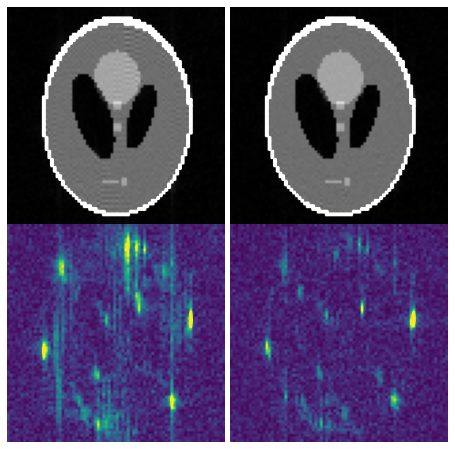

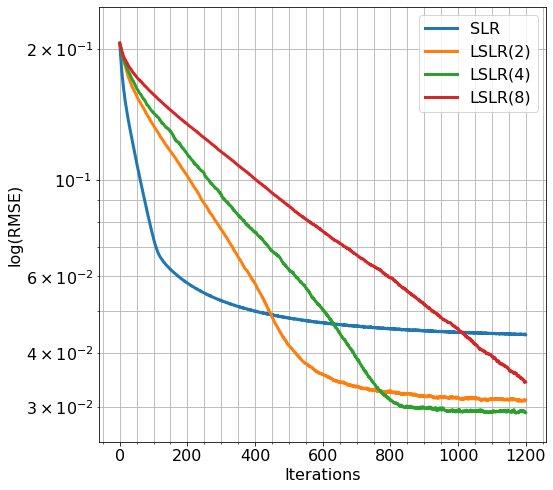

In [90]:
_, ax = plt.subplots(2,2, figsize=(8,8))
# 
# ax[0,0].imshow(np.abs(utils.ifftdim(pg, dims=(0,1))), vmin=0, vmax=2E-1, cmap='gray')
# ax[0,0].set_title('Ground Truth')
ax[0,0].imshow(np.abs(utils.ifftdim(z5s_115PF[0], dims=(0,1))), vmin=0, vmax=1E-1, cmap='gray')
# ax[0,0].set_title('SLR')
ax[0,0].axis('off')
ax[0,1].imshow(np.abs(utils.ifftdim(x4s_115PF[0], dims=(0,1))), vmin=0, vmax=1E-1, cmap='gray')
# ax[0,1].set_title('LSLR(8)')
ax[0,1].axis('off')

# ax[1,0].imshow(np.abs(utils.ifftdim(pg-pg, dims=(0,1))), vmin=0, vmax=2E-2)
# ax[1,0].set_title('Ground Truth diff (x10)')
ax[1,0].imshow(np.abs(utils.ifftdim(z5s_115PF[0]-pg, dims=(0,1))), vmin=0, vmax=1E-2)
# ax[1,0].set_title('SLR diff')
ax[1,0].axis('off')
plt.axis('off')
ax[1,1].imshow(np.abs(utils.ifftdim(x4s_115PF[0]-pg, dims=(0,1))), vmin=0, vmax=1E-2)
# ax[1,1].set_title('LSLR(2) diff')
ax[1,1].axis('off')
# plt.rc('font', size=12)
plt.subplots_adjust(wspace=0,hspace=0)

_, ax = plt.subplots(figsize=(8,8))
ax.semilogy(z5s_115PF[1], linewidth=3, label='SLR')
ax.semilogy(x2s_120PF[1], linewidth=3, label='LSLR(2)')
ax.semilogy(x4s_115PF[1], linewidth=3, label='LSLR(4)')
ax.semilogy(x8s_105PF[1], linewidth=3, label='LSLR(8)')
# ax.semilogy(x12[1], linewidth=3, label='x12')
plt.legend()
plt.rc('font', size=16)
plt.ylim([0.025,0.25])
plt.grid(b=True, which='major') 
plt.grid(b=True, which='minor') 
plt.minorticks_on()
plt.xlabel('Iterations')
plt.ylabel('log(RMSE)')

In [56]:
for r in np.arange(60,100,5):
    z = SLR.ADMM(fx2, SLR.c_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1000, init=None, gt=pg, tol=1E-3)
    print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.1808471476088142
Iter: 200, RMSE: 0.18302917298680865
Iter: 300, RMSE: 0.18782280490524966
Iter: 400, RMSE: 0.1925358791259495
Iter: 500, RMSE: 0.19654592984573233
Iter: 600, RMSE: 0.19978847724699722
Iter: 700, RMSE: 0.20239698939317158
Iter: 800, RMSE: 0.2043458158844166
Iter: 900, RMSE: 0.2058985461578221
Rank: 60, Full Matrix, RMSE: 0.20699847477557431
Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.18857807332597304
Iter: 200, RMSE: 0.18411742814933554
Iter: 300, RMSE: 0.18280874505573097
Iter: 400, RMSE: 0.18286906789244625
Iter: 500, RMSE: 0.18362524800294383
Iter: 600, RMSE: 0.18476603877590075
Iter: 700, RMSE: 0.1861007133733424
Iter: 800, RMSE: 0.18752916001134642
Iter: 900, RMSE: 0.18898918545746998
Rank: 65, Full Matrix, RMSE: 0.19041165760984963
Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.19942393916326628
Iter: 200, RMSE: 0.19628605822362713
Iter: 300, RMSE: 0.19399029671178475
Iter: 400, RMSE: 0.192205700

In [57]:
r=65
z5c_65PF = SLR.ADMM(fx2, SLR.c_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5c_65PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.18857807332597304
Iter: 200, RMSE: 0.18411742814933554
Iter: 300, RMSE: 0.18280874505573097
Iter: 400, RMSE: 0.18286906789244625
Iter: 500, RMSE: 0.18362524800294383
Iter: 600, RMSE: 0.18476603877590075
Iter: 700, RMSE: 0.1861007133733424
Iter: 800, RMSE: 0.18752916001134642
Iter: 900, RMSE: 0.18898918545746998
Iter: 1000, RMSE: 0.19044089651711013
Iter: 1100, RMSE: 0.19185548956874188
Rank: 65, Full Matrix, RMSE: 0.19319136686714472


In [58]:
r=60
z5c_60PF = SLR.ADMM(fx2, SLR.c_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5c_60PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.1808471476088142
Iter: 200, RMSE: 0.18302917298680865
Iter: 300, RMSE: 0.18782280490524966
Iter: 400, RMSE: 0.1925358791259495
Iter: 500, RMSE: 0.19654592984573233
Iter: 600, RMSE: 0.19978847724699722
Iter: 700, RMSE: 0.20239698939317158
Iter: 800, RMSE: 0.2043458158844166
Iter: 900, RMSE: 0.2058985461578221
Iter: 1000, RMSE: 0.20702292765311808
Iter: 1100, RMSE: 0.20789134229320824
Rank: 60, Full Matrix, RMSE: 0.2085144237721663


In [59]:
r=70
z5c_70PF = SLR.ADMM(fx2, SLR.c_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5c_70PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.19942393916326628
Iter: 200, RMSE: 0.19628605822362713
Iter: 300, RMSE: 0.19399029671178475
Iter: 400, RMSE: 0.19220570046320162
Iter: 500, RMSE: 0.19077773952914603
Iter: 600, RMSE: 0.18961712897076313
Iter: 700, RMSE: 0.18866498424528697
Iter: 800, RMSE: 0.18787926020165352
Iter: 900, RMSE: 0.18723046618950934
Iter: 1000, RMSE: 0.18669578512121246
Iter: 1100, RMSE: 0.18625660328944332
Rank: 70, Full Matrix, RMSE: 0.18591009808758974


In [61]:
r=75
z5c_75PF = SLR.ADMM(fx2, SLR.c_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z5c_75PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.20482563323704345
Iter: 200, RMSE: 0.20389070810773283
Iter: 300, RMSE: 0.20310718503343506
Iter: 400, RMSE: 0.20244597819912377
Iter: 500, RMSE: 0.20186866896138939
Iter: 600, RMSE: 0.20135187997122664
Iter: 700, RMSE: 0.20088092428039594
Iter: 800, RMSE: 0.20044598259851085
Iter: 900, RMSE: 0.20004071519768513
Iter: 1000, RMSE: 0.19965998763432383
Iter: 1100, RMSE: 0.19930038979978512
Rank: 75, Full Matrix, RMSE: 0.19895866084079541


In [60]:
for r in np.arange(50,100,5):
    x2ini = SLR.ADMM(fx2, SLR.c_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=1200, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2ini[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.1566653768126432
Iter: 200, RMSE: 0.15997746406594146
Iter: 300, RMSE: 0.1587603959297152
Iter: 400, RMSE: 0.16024692436178054
Iter: 500, RMSE: 0.16053391590362812
Iter: 600, RMSE: 0.1598296843717522
Iter: 700, RMSE: 0.15836357948208166
Iter: 800, RMSE: 0.15756277417714346
Iter: 900, RMSE: 0.15763283956516458
Iter: 1000, RMSE: 0.15526178041460606
Iter: 1100, RMSE: 0.15750676763204935
Rank: 50, Batch Size (Block): 2, RMSE: 0.1590588103534052
Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.15963911374045164
Iter: 200, RMSE: 0.15594323995582707
Iter: 300, RMSE: 0.15466110186023824
Iter: 400, RMSE: 0.15597650776896468
Iter: 500, RMSE: 0.15555166781064858
Iter: 600, RMSE: 0.15736820743709504
Iter: 700, RMSE: 0.15508518711353925
Iter: 800, RMSE: 0.15407870257441286
Iter: 900, RMSE: 0.15517291554951365
Iter: 1000, RMSE: 0.15522276046539962
Iter: 1100, RMSE: 0.15293247648131572
Rank: 55, Batch Size (Block): 2, RMSE: 0.15146116724203024


KeyboardInterrupt: 

In [62]:
for r in np.arange(50,100,5):
    x4ini = SLR.ADMM(fx2, SLR.c_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=1200, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.15979794309852918
Iter: 200, RMSE: 0.1504727384051704
Iter: 300, RMSE: 0.14806019444250615
Iter: 400, RMSE: 0.1466717588268128
Iter: 500, RMSE: 0.14703617570768157
Iter: 600, RMSE: 0.14744648392418566
Iter: 700, RMSE: 0.14715865401109263
Iter: 800, RMSE: 0.1477266776357022
Iter: 900, RMSE: 0.14851892274744408
Iter: 1000, RMSE: 0.1487178129395371
Iter: 1100, RMSE: 0.14827092356937566
Rank: 50, Batch Size (Block): 4, RMSE: 0.1488771326359534
Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.17052733766948958
Iter: 200, RMSE: 0.15964017699943323
Iter: 300, RMSE: 0.1539733033488104
Iter: 400, RMSE: 0.15023805090315426
Iter: 500, RMSE: 0.14823170323752943
Iter: 600, RMSE: 0.14761676485449493
Iter: 700, RMSE: 0.14735357916961267
Iter: 800, RMSE: 0.14729231977660703
Iter: 900, RMSE: 0.14709768243007007
Iter: 1000, RMSE: 0.1473244999581459
Iter: 1100, RMSE: 0.14773445086428724
Rank: 55, Batch Size (Block): 4, RMSE: 0.14766083921038067
Ite

KeyboardInterrupt: 

In [67]:
r=55
x4c_55PF = SLR.ADMM(fx2, SLR.c_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4c_55PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.17153775000870708
Iter: 200, RMSE: 0.16016474735122732
Iter: 300, RMSE: 0.15390743441354107
Iter: 400, RMSE: 0.15020267584256092
Iter: 500, RMSE: 0.1485276124413114
Iter: 600, RMSE: 0.14767773767419895
Iter: 700, RMSE: 0.14740166110357467
Iter: 800, RMSE: 0.14718625969481233
Iter: 900, RMSE: 0.1471037996470173
Iter: 1000, RMSE: 0.14742733933128535
Iter: 1100, RMSE: 0.14742358574225162
Rank: 55, Batch Size (Block): 4, RMSE: 0.14758573489184298


In [66]:
r=60
x4c_60PF = SLR.ADMM(fx2, SLR.c_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=1200, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4c_60PF[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.1809614455563807
Iter: 200, RMSE: 0.17174594543361985
Iter: 300, RMSE: 0.16585699454128366
Iter: 400, RMSE: 0.16109858996255547
Iter: 500, RMSE: 0.15749043057754764
Iter: 600, RMSE: 0.15478390705614542
Iter: 700, RMSE: 0.15277464097327992
Iter: 800, RMSE: 0.15129870864986905
Iter: 900, RMSE: 0.14993926744871666
Iter: 1000, RMSE: 0.14921424713961334
Iter: 1100, RMSE: 0.14843613778758497
Rank: 60, Batch Size (Block): 4, RMSE: 0.14813910350850798


In [68]:
for r in np.arange(30,130,5):
    x8ini = SLR.ADMM(fx2, SLR.c_matrix, kernel, r, batch=SLR.sub_block(8), p=1E-10,  niters=1200, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {8}, RMSE: {rmse(x8ini[0])}')

Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.15577965114385994
Iter: 200, RMSE: 0.15234980020894393
Iter: 300, RMSE: 0.15254747127079563
Iter: 400, RMSE: 0.15127086578172538
Iter: 500, RMSE: 0.1478184216235569
Iter: 600, RMSE: 0.14753506221716997
Iter: 700, RMSE: 0.14831101114885303
Iter: 800, RMSE: 0.1495530427651511
Iter: 900, RMSE: 0.14757877706799316
Iter: 1000, RMSE: 0.14895132851267157
Iter: 1100, RMSE: 0.14695340416476377
Rank: 30, Batch Size (Block): 8, RMSE: 0.149584808519897
Iter: 0, RMSE: 0.2063181059095545
Iter: 100, RMSE: 0.15531608965665472
Iter: 200, RMSE: 0.14805364062017193
Iter: 300, RMSE: 0.1441627925712591
Iter: 400, RMSE: 0.14361268178371178
Iter: 500, RMSE: 0.1432716346955182
Iter: 600, RMSE: 0.1428124557801157
Iter: 700, RMSE: 0.14290863152981303
Iter: 800, RMSE: 0.14309140839631151
Iter: 900, RMSE: 0.14168853434367026
Iter: 1000, RMSE: 0.14222892822060212
Iter: 1100, RMSE: 0.14296884130724521
Rank: 35, Batch Size (Block): 8, RMSE: 0.1422518754851795
Iter